In [7]:
# Importing Libraries

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Establishing a connection

conn = sqlite3.connect("sales_data.db")

cur = conn.cursor()

In [3]:
# Creating a table

table1 = """CREATE TABLE IF NOT EXISTS
TOTAL_SALES(customer_id INTEGER PRIMARY KEY, product TEXT, total_quantity INTEGER, item_price FLOAT)"""

cur.execute(table1)

In [4]:
# Insert values

cur.execute("INSERT INTO TOTAL_SALES VALUES (1584,'Coffee beans', 5, 10.56)")
cur.execute("INSERT INTO TOTAL_SALES VALUES (1654,'Complan', 8, 60.50)")
cur.execute("INSERT INTO TOTAL_SALES VALUES (1789,'Baby Milk', 9, 40.70)")
cur.execute("INSERT INTO TOTAL_SALES VALUES (1463,'Apple', 10, 30.00)")
cur.execute("INSERT INTO TOTAL_SALES VALUES (1963,'Sugar', 15, 15.50)")
cur.execute("INSERT INTO TOTAL_SALES VALUES (1328,'Candy', 7, 6.58)")
cur.execute("INSERT INTO TOTAL_SALES VALUES (1234,'Protein Shake', 16, 180.60)")
cur.execute("INSERT INTO TOTAL_SALES VALUES (1462,'Biscuits', 4, 50.40)")
cur.execute("INSERT INTO TOTAL_SALES VALUES (1892,'Cookies', 6, 70.50)")
cur.execute("INSERT INTO TOTAL_SALES VALUES (1336,'Cake', 2, 140.50)")

In [5]:
# Getting results

cur.execute("SELECT * FROM TOTAL_SALES")

results = cur.fetchall()
print(results)

[(1234, 'Protein Shake', 16, 180.6), (1328, 'Candy', 7, 6.58), (1336, 'Cake', 2, 140.5), (1462, 'Biscuits', 4, 50.4), (1463, 'Apple', 10, 30.0), (1584, 'Coffee beans', 5, 10.56), (1654, 'Complan', 8, 60.5), (1789, 'Baby Milk', 9, 40.7), (1892, 'Cookies', 6, 70.5), (1963, 'Sugar', 15, 15.5)]


In [6]:
# Getting results of specific query

query = "SELECT product, SUM(total_quantity) AS total_qty, SUM(total_quantity * item_price) AS revenue FROM TOTAL_SALES GROUP BY product"

df = pd.read_sql_query(query, conn)

print(df)

         product  total_qty  revenue
0          Apple         10   300.00
1      Baby Milk          9   366.30
2       Biscuits          4   201.60
3           Cake          2   281.00
4          Candy          7    46.06
5   Coffee beans          5    52.80
6        Complan          8   484.00
7        Cookies          6   423.00
8  Protein Shake         16  2889.60
9          Sugar         15   232.50


<AxesSubplot: xlabel='product'>

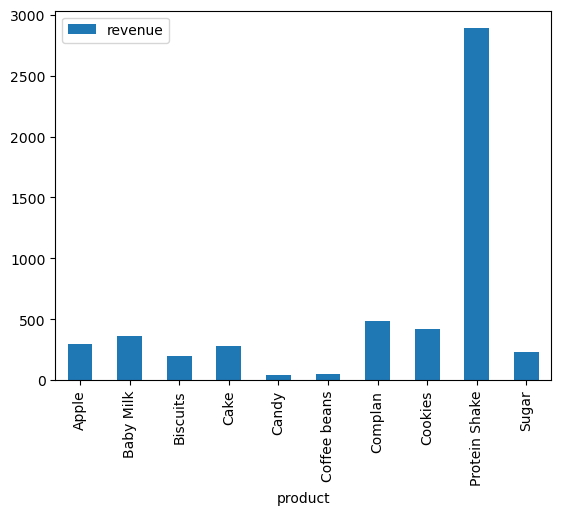

In [10]:
# Bar Chart (product Vs Revenue)

df.plot(kind = 'bar', x = 'product', y = 'revenue')

In [ ]:
plt.savefig('Sales_chart.p')